In [ ]:
# Required Libraries
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
!pip install pandas mlxtend openpyxl
!pip install pandas mlxtend openpyxl matplotlib seaborn
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# import and loading dataset
import pandas as pd
data = pd.read_csv('Assignment-1_Data.csv', on_bad_lines='skip')


In [ ]:
import pandas as pd

# Try different delimiters
try:
    data = pd.read_csv('/content/Assignment-1_Data.csv', delimiter=',')  # Default is comma
except pd.errors.ParserError:
    try:
        data = pd.read_csv('/content/Assignment-1_Data.csv', delimiter=';')  # Try semicolon
    except pd.errors.ParserError:
        try:
            data = pd.read_csv('/content/Assignment-1_Data.csv', delimiter='\t')  # Try tab
        except pd.errors.ParserError:
            # If none of the above work, it might be due to inconsistent data within fields
            # You can try using the 'error_bad_lines=False' to skip problematic lines:
            data = pd.read_csv('/content/Assignment-1_Data.csv', error_bad_lines=False)
            print("Warning: Skipped lines with errors. Check your CSV file for inconsistencies.")

# Print some info to check if the data loaded correctly
print(data.head())  # Print first 5 rows
print(data.info())  # Print data types and non-null counts

# Initial Exploration

In [ ]:
# Display basic information about the dataset
print("Number of rows and columns:", data.shape) # Changed df to data
print("\nData Types and Missing Values:")
print(data.info()) # Changed df to data
print("\nFirst few rows of the dataset:")
print(data.head()) # Changed df to data

Number of rows and columns: (399193, 7)

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399193 entries, 0 to 399192
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      399193 non-null  object 
 1   Itemname    397842 non-null  object 
 2   Quantity    399193 non-null  int64  
 3   Date        399193 non-null  object 
 4   Price       399192 non-null  object 
 5   CustomerID  295406 non-null  float64
 6   Country     399192 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 21.3+ MB
None

First few rows of the dataset:
   BillNo                             Itemname  Quantity              Date  \
0  536365   WHITE HANGING HEART T-LIGHT HOLDER         6  01.12.2010 08:26   
1  536365                  WHITE METAL LANTERN         6  01.12.2010 08:26   
2  536365       CREAM CUPID HEARTS COAT HANGER         8  01.12.2010 08:26   
3  536365  KNITTED UNION FLA

In [ ]:
data

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,09.12.2011 12:50,"0,85",12680.0,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,09.12.2011 12:50,"2,1",12680.0,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,09.12.2011 12:50,"4,15",12680.0,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,09.12.2011 12:50,"4,15",12680.0,France


# Preprocessing

In [ ]:
#Check Missing Values
print("Missing Values:")
print(data.isnull().sum()) # Changed df to data

#Drop Rows with Missing Values
data.dropna(inplace=True) # Changed df to data

Missing Values:
BillNo             0
Itemname        1351
Quantity           0
Date               0
Price              1
CustomerID    103787
Country            1
dtype: int64


In [ ]:
description = data.describe()
print(description)

            Quantity     CustomerID
count  295406.000000  295406.000000
mean       13.271907   15308.041462
std       143.508647    1723.880693
min         1.000000   12346.000000
25%         2.000000   13882.000000
50%         6.000000   15249.000000
75%        12.000000   16818.000000
max     74215.000000   18287.000000


# Creating a transaction DataFrame

In [ ]:
# Assuming 'data' is your DataFrame, and it was previously called 'df'
baskets = (data.groupby(["BillNo","Itemname"])["Quantity"].sum().unstack()).fillna(0)

# Now you can use 'baskets'
baskets

Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
BillNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
572055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
572056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
baskets

Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
BillNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
572055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
572056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def to_bool(x):
    if x <= 0:
        return False
    if x >= 1:
        return True
basketbool = baskets.apply(lambda col: col.map(to_bool))
basketbool

Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
BillNo,,,,,,,,,,,,,,,,,,,,,
536365,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536366,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536367,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536368,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536369,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572054,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
572055,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
572056,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules


# Create the basket matrix
basket = data.groupby(['BillNo', 'Itemname'])['Quantity'].sum().unstack().fillna(0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-4-7594a27d50dc>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules




# Apply the apriori algorithm
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)
frequent_itemsets



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the results
print(rules.sort_values('confidence', ascending=False))

In [ ]:
import pandas as pd

# Try different delimiters
try:
    data = pd.read_csv('/content/Assignment-1_Data.csv', delimiter=',')  # Default is comma
except pd.errors.ParserError:
    try:
        data = pd.read_csv('/content/Assignment-1_Data.csv', delimiter=';')  # Try semicolon
    except pd.errors.ParserError:
        try:
            data = pd.read_csv('/content/Assignment-1_Data.csv', delimiter='\t')  # Try tab
        except pd.errors.ParserError:
            # If none of the above work, it might be due to inconsistent data within fields
            # You can try using the 'error_bad_lines=False' to skip problematic lines:
            data = pd.read_csv('/content/Assignment-1_Data.csv', error_bad_lines=False)
            print("Warning: Skipped lines with errors. Check your CSV file for inconsistencies.")

# Print some info to check if the data loaded correctly
print(data.head())  # Print first 5 rows
print(data.info())  # Print data types and non-null counts

<ipython-input-1-5779037d7aa7>:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/Assignment-1_Data.csv', delimiter=';')  # Try semicolon


   BillNo                             Itemname  Quantity              Date  \
0  536365   WHITE HANGING HEART T-LIGHT HOLDER         6  01.12.2010 08:26   
1  536365                  WHITE METAL LANTERN         6  01.12.2010 08:26   
2  536365       CREAM CUPID HEARTS COAT HANGER         8  01.12.2010 08:26   
3  536365  KNITTED UNION FLAG HOT WATER BOTTLE         6  01.12.2010 08:26   
4  536365       RED WOOLLY HOTTIE WHITE HEART.         6  01.12.2010 08:26   

  Price  CustomerID         Country  
0  2,55     17850.0  United Kingdom  
1  3,39     17850.0  United Kingdom  
2  2,75     17850.0  United Kingdom  
3  3,39     17850.0  United Kingdom  
4  3,39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    522064 n

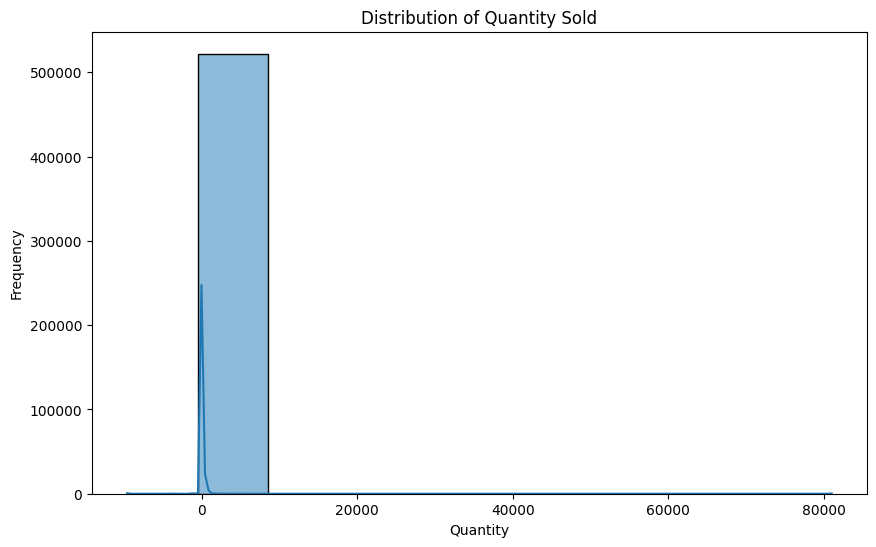

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['Quantity'], bins=10, kde=True)
plt.title('Distribution of Quantity Sold')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

<ipython-input-3-c8f2540e30dc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.index, y=top_items.values, palette='viridis')


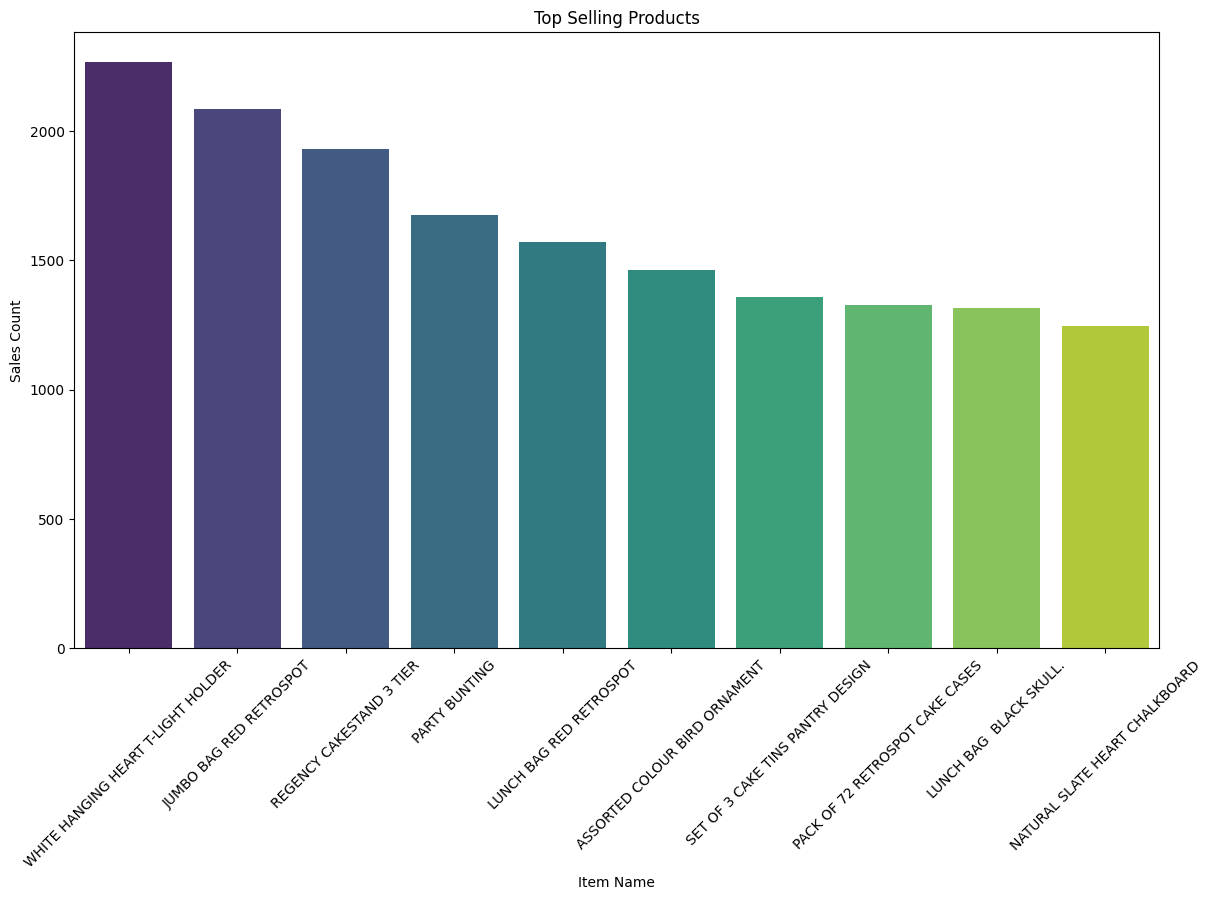

In [ ]:
plt.figure(figsize=(14, 8))
top_items = data['Itemname'].value_counts().nlargest(10)
sns.barplot(x=top_items.index, y=top_items.values, palette='viridis')
plt.title('Top Selling Products')
plt.xlabel('Item Name')
plt.ylabel('Sales Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-4-63d2e797a849>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_sales.index, y=country_sales.values, palette='magma')


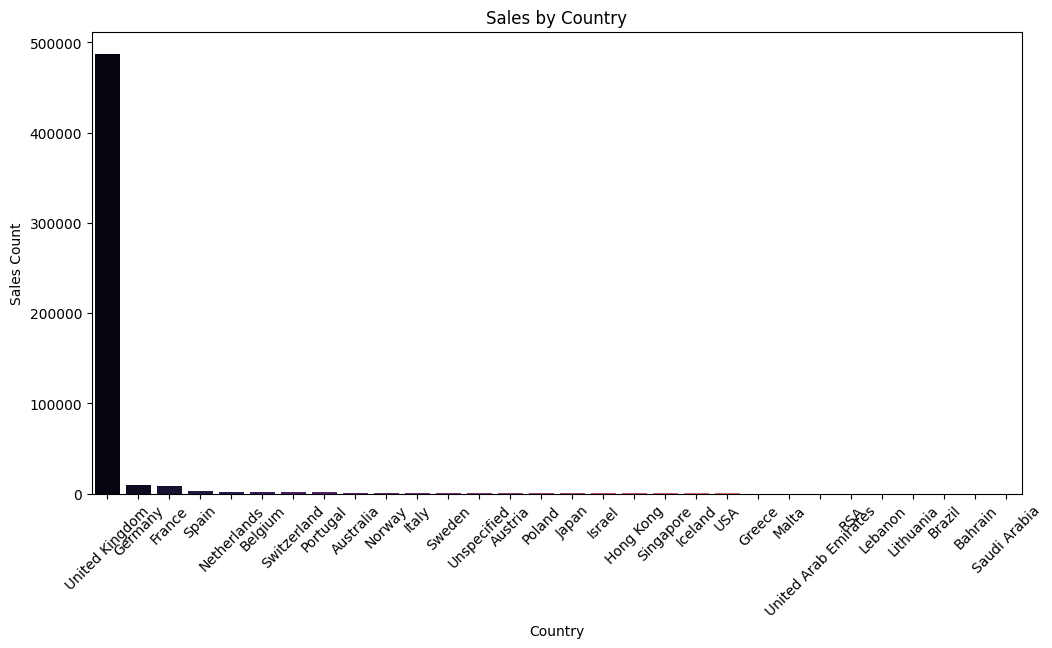

In [ ]:
plt.figure(figsize=(12, 6))
country_sales = data['Country'].value_counts()
sns.barplot(x=country_sales.index, y=country_sales.values, palette='magma')
plt.title('Sales by Country')
plt.xlabel('Country')
plt.ylabel('Sales Count')
plt.xticks(rotation=45)
plt.show()